In [1]:
import pandas as pd

In [2]:
iris=pd.read_csv("Iris.csv")
# iris.head()
# iris.shape
# iris.describe()

In [3]:
iris=pd.read_csv("Iris.csv",na_values=['NA'])
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

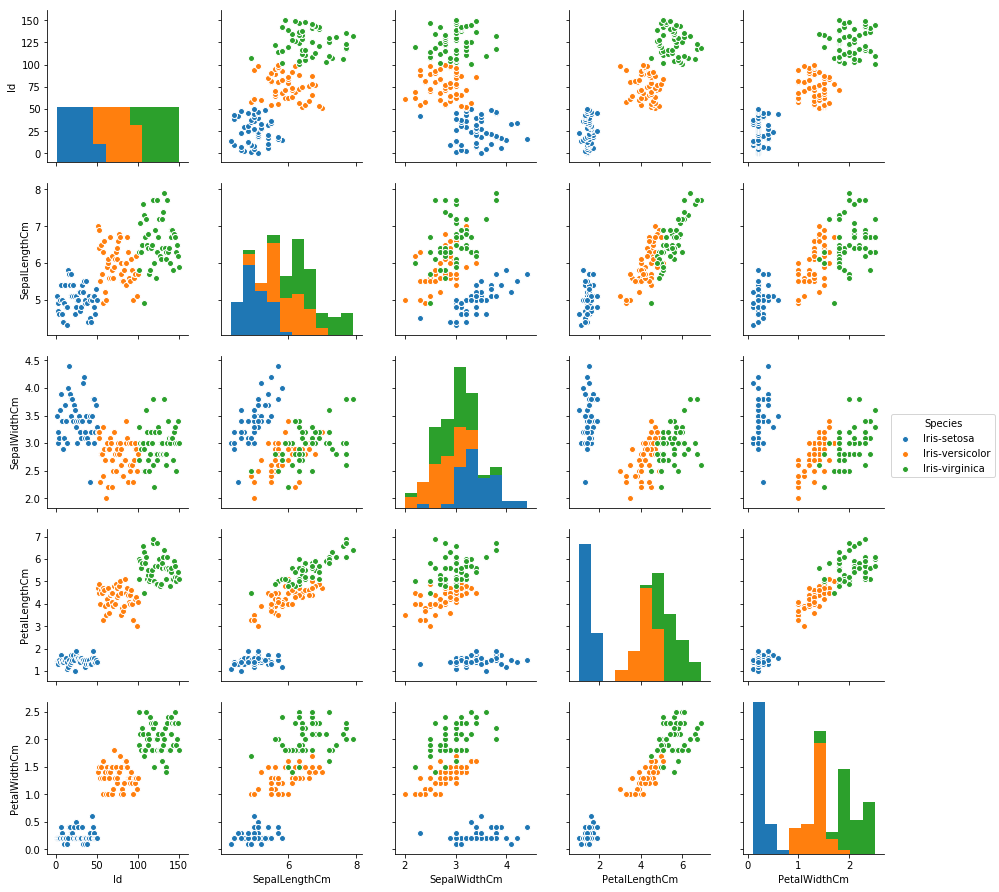

In [5]:
sb.pairplot(iris.dropna(),hue='Species')

In [6]:
#修正类别标签
iris.loc[iris['Species']=='Iris-setossa','Species']='Iris-setosa'
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

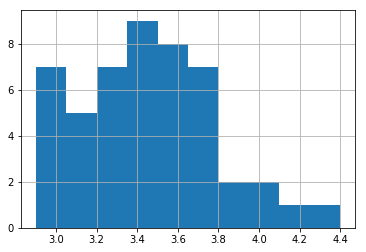

In [7]:
#删除异常数据
iris=iris.loc[(iris['Species']!='Iris-setosa')|(iris['SepalWidthCm']>=2.5)]
iris.loc[iris['Species']=='Iris-setosa','SepalWidthCm'].hist()

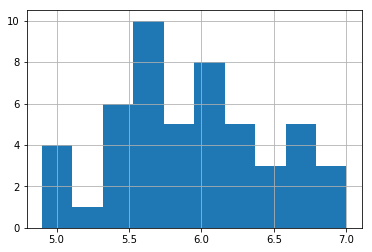

In [8]:
iris.loc[(iris['Species']=='Iris-versicolor')&(iris['SepalLengthCm']<1.0)]
iris.loc[iris['Species']=='Iris-versicolor','SepalLengthCm'].hist()

In [9]:
#查看缺失值
iris.loc[(iris['SepalLengthCm'].isnull())|(iris['SepalWidthCm'].isnull())]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [10]:
#填补缺失值
average_width=iris.loc[iris['Species']=='Iris-setosa','PetalWidthCm'].mean()
iris.loc[(iris['Species']=='Iris-setosa')&(iris['PetalWidthCm'].isnull()),'PetalWidthCm']=average_width
#删除所有缺失数据的行
iris.dropna(inplace=True)

In [11]:
#保存清洗过的数据
iris.to_csv('cleaned.csv',index=True)

In [12]:
#利用assert进行单元测试
assert 1==1
assert len(iris['Species'].unique())==5

AssertionError: 

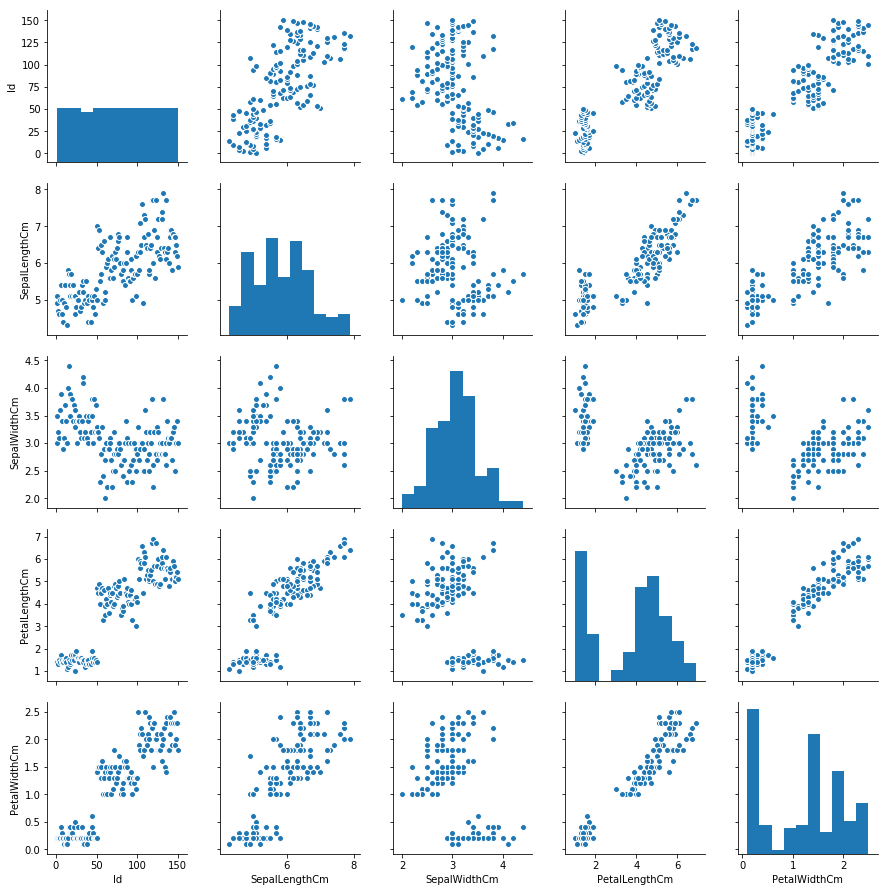

In [13]:
sb.pairplot(iris)
#sb.pairplot(iris,hue='Species')#对类别着色

In [14]:
iris=iris.drop(['Id'],axis=1)

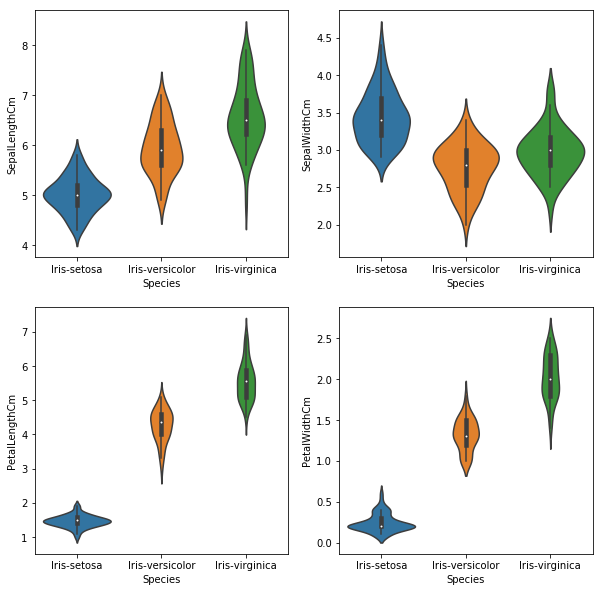

In [15]:
#volin plots比较类别的测量值分布
plt.figure(figsize=(10,10))
for column_index,column in enumerate(iris.columns):
    if column=='Species':
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='Species',y=column,data=iris)

In [16]:
#提取数据
all_input=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
all_species=iris['Species'].values
all_input[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [17]:
#划分测试集，训练集
from sklearn.cross_validation import train_test_split
(train_input,
 test_input,
 train_class,
 test_class)=train_test_split(all_input,all_species,train_size=0.75,random_state=1)

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier=DecisionTreeClassifier()
decision_tree_classifier.fit(train_input,train_class)
decision_tree_classifier.score(test_input,test_class)

0.97368421052631582

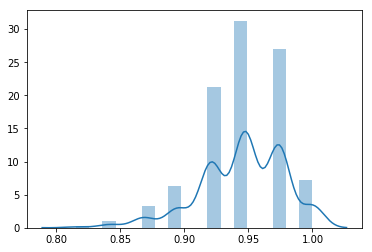

In [19]:
model_accuracies=[]
for repetition in range(1000):
    (train_input,test_input,train_class,test_class)=train_test_split(all_input,all_species,train_size=0.75)
    decision_tree_classifier=DecisionTreeClassifier()
    decision_tree_classifier.fit(train_input,train_class)
    score=decision_tree_classifier.score(test_input,test_class)
    model_accuracies.append(score)
sb.distplot(model_accuracies)#频数分布直方图
#过度拟合：训练子集不同，模型表现非常不同

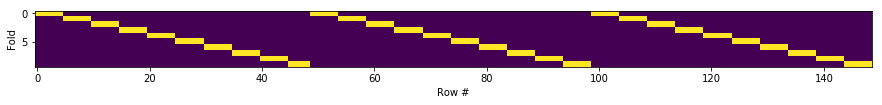

In [20]:
#交叉验证 维护子集代表性
import numpy as np
from sklearn.cross_validation import StratifiedKFold
#所有fold中类别比例相同
# cv=StratifiedKFold(all_species,n_folds=10)
# for train,test in cv:
#     print train,test
def plot_cv(cv,n_samples):
    masks=[]
    for train,test in cv:
        mask=np.zeros(n_samples,dtype=bool)
        mask[test]=1#test是ndarray
        masks.append(mask)
    plt.figure(figsize=(15,15))
    plt.imshow(masks,interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')
plot_cv(StratifiedKFold(all_species,n_folds=10),len(all_species))

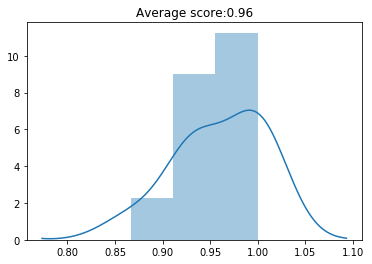

In [21]:
from sklearn.cross_validation import cross_val_score
decision_tree_classifier=DecisionTreeClassifier()
cv_scores=cross_val_score(decision_tree_classifier,all_input,all_species,cv=10)
sb.distplot(cv_scores)
plt.title('Average score:{}'.format(np.mean(cv_scores)))

In [22]:
#网格搜索调参
from sklearn.grid_search import GridSearchCV
decision_tree_classifier=DecisionTreeClassifier()
parameter_grid={
    'max_depth':[1,2,3,4,5],
    'max_features':[1,2,3,4]
}
cross_validation=StratifiedKFold(all_species,n_folds=10)
grid_search=GridSearchCV(decision_tree_classifier,param_grid=parameter_grid,cv=cross_validation)
grid_search.fit(all_input,all_species)
print('Best score:{}'.format(grid_search.best_score_))
print('Best parameters:{}'.format(grid_search.best_params_))

c:\python27\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best score:0.96644295302
Best parameters:{'max_features': 3, 'max_depth': 5}


[ 0.6442953   0.65771812  0.66442953  0.66442953  0.79865772  0.93959732
  0.94630872  0.95302013  0.93959732  0.91946309  0.95973154  0.95973154
  0.93959732  0.93959732  0.94630872  0.95302013  0.93959732  0.95973154
  0.96644295  0.95302013] [1, 2, 3, 4]


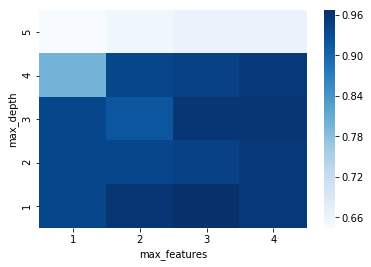

In [25]:
#网格搜索可视化
grid_visualization=[]
for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

    
grid_visualization=np.array(grid_visualization)
print grid_visualization,grid_search.param_grid['max_features']
grid_visualization.shape=(5,4)#所有参数可能取值
sb.heatmap(grid_visualization,cmap='Blues')
plt.xticks(np.arange(4)+0.5,grid_search.param_grid['max_features'])
plt.yticks(np.arange(5)+0.5,grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [46]:
decision_tree_classifier=DecisionTreeClassifier()
parameter_grid={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':[1,2,3,4]
}
cross_validation=StratifiedKFold(all_species,n_folds=10)
grid_search=GridSearchCV(decision_tree_classifier,param_grid=parameter_grid,cv=cross_validation)
grid_search.fit(all_input,all_species)
print('Best scores:{}'.format(grid_search.best_score_))
print('Best parameter:{}'.format(grid_search.best_params_))

Best scores:0.959731543624
Best parameter:{'max_features': 4, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 3}


In [48]:
decision_tree_classifier=grid_search.best_estimator_
decision_tree_classifier


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
#可视化决策树
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot','w') as out_file:
    out_file=tree.export_graphviz(decision_tree_classifier,out_file=out_file)

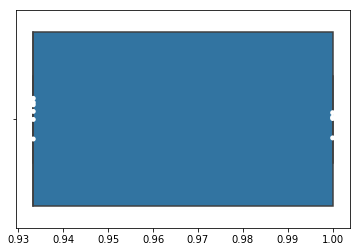

In [53]:
dt_scores=cross_val_score(decision_tree_classifier,all_input,all_species,cv=10)
sb.boxplot(dt_scores)
sb.stripplot(dt_scores,jitter=True,color='white')

In [71]:
#随机森林分类器
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier=RandomForestClassifier()
parameter_grid={
    'n_estimators':[5,10,25,50],
    'criterion':['gini','entropy'],
    'max_features':[1,2,3,4],
    'warm_start':[True,False]
}
cross_validation=StratifiedKFold(all_species,n_folds=10)
grid_search=GridSearchCV(random_forest_classifier,param_grid=parameter_grid,cv=cross_validation)
grid_search.fit(all_input,all_species)
print('Best scores:{}'.format(grid_search.best_score_))
print('Best parameter:{}'.format(grid_search.best_params_))

grid_search.best_estimator

0.9664429530201343

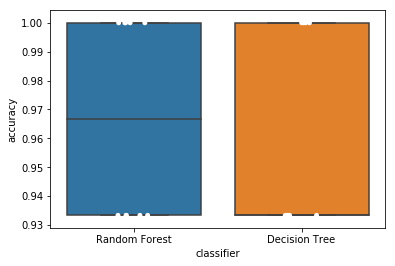

In [84]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_input, all_species,cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_input, all_species,cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='white')

In [85]:
#显示分类器的预测结果
(train_input,
 test_input,
 train_class,
 test_class
)=train_test_split(all_input,all_species,train_size=0.75)
random_forest_classifier.fit(train_input,train_class)

for input_features,prediction,actual in zip(test_input[:10],random_forest_classifier.predict(test_input[:10]),test_class[:10]):
    print('{}\t-->{}\t(Actual:{})'.format(input_features,prediction,actual))

[ 6.2  2.8  4.8  1.8]	-->Iris-virginica	(Actual:Iris-virginica)
[ 5.5  3.5  1.3  0.2]	-->Iris-setosa	(Actual:Iris-setosa)
[ 6.5  3.   5.2  2. ]	-->Iris-virginica	(Actual:Iris-virginica)
[ 5.5  4.2  1.4  0.2]	-->Iris-setosa	(Actual:Iris-setosa)
[ 4.9  3.1  1.5  0.1]	-->Iris-setosa	(Actual:Iris-setosa)
[ 6.1  3.   4.6  1.4]	-->Iris-versicolor	(Actual:Iris-versicolor)
[ 4.4  3.   1.3  0.2]	-->Iris-setosa	(Actual:Iris-setosa)
[ 4.7  3.2  1.6  0.2]	-->Iris-setosa	(Actual:Iris-setosa)
[ 5.7  4.4  1.5  0.4]	-->Iris-setosa	(Actual:Iris-setosa)
[ 6.7  3.1  5.6  2.4]	-->Iris-virginica	(Actual:Iris-virginica)


c:\python27\lib\site-packages\sklearn\ensemble\forest.py:303: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [ ]:
#绘制交叉验证得分
rf_classifier_scores=cross_val_score(random_forest_classifier,all_input,all_species,cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores,ji)